# Pooling-imputation performance from real bead chip data

Performs pooling simulation and imputation on data from the chromosome 20 of 1000GP.
Markers have been chosen as the intersection between the real bead chip Illumina Infinium OmniExpress
 (https://support.illumina.com/array/array_kits/humanomniexpress-24-beadchip-kit/downloads.html) 
 and the chr20 1000GP data. The samples are randomly assigned to the reference panel or the study population.

Extract markers coordinates of this bead chip, provided on the manufacturer website 
(https://support.illumina.com/content/dam/illumina-support/documents/downloads/productfiles/humanomniexpress-24/v1-3/infinium-omniexpress-24-v1-3-a1-physical-genetic-coordinates.zip)

Subset markers from the 1000GP project based on this markers list

Apply pooling simulation on this data, and imputation (run parallel execution): 
**pool and impute bead chip markers only, compute metrics and plot statistics** 

In [1]:
import os

os.chdir('/home/camille/PoolImpHuman/data/20200624')

In [2]:
print('Configure directory')
%sx ln -s ~/1000Genomes/scripts/VCFPooling/python/omniexpress24chr20.ipynb ./
%sx ln -s ~/1000Genomes/scripts/VCFPooling/python/omniexpress_20200624.ipynb ./
%sx ln -s ~/1000Genomes/scripts/VCFPooling/python/parallel_pooling_20200624.py ./
%sx ln -s ~/1000Genomes/scripts/VCFPooling/python/beagle_impute_20200624.py ./

Configure directory


["ln: failed to create symbolic link './beagle_impute_20200624.py': File exists"]

### Prepare experimental VCF file

In [3]:
print('Create file')
# %sx bcftools view -Oz -o ALL.chr20.snps.gt.vcf.gz -R InfiniumOmniExpress-chr20-CHROM-POS.txt ../main/ALL.chr20.snps.gt.vcf.gz

Create file


In [4]:
print('Index file')
# %sx bcftools index ALL.chr20.snps.gt.vcf.gz

Index file


In [2]:
print('Check number of samples')
%sx bcftools query -l ALL.chr20.snps.gt.vcf.gz | wc -l

Check number of samples


['2504']

In [6]:
print('Check number of intersected markers')
%sx bcftools view -H ALL.chr20.snps.gt.vcf.gz | wc -l

Check number of intersected markers


['17791']

In [7]:
print('Shuffle split into file for STU and PAN populations')
from scripts.VCFPooling.poolSNPs import poolvcf
from scripts.VCFPooling.poolSNPs.pooler import Design

ds = Design()
dm = ds.matrix

sfsp = poolvcf.ShuffleSplitVCF(dm, 'ALL.chr20.snps.gt.vcf.gz', stu_size=0.1, wd=os.getcwd())
sfsp.split_file('chr20.snps.gt.vcf.gz')
# Change files prefixes to not mess up all the settings

Shuffle split into file for STU and PAN populations
['/home/camille/PoolImpHuman/data/omniexpress', '/home/camille/1000Genomes', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages/setuptools-40.8.0-py3.6.egg', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages/pip-19.0.3-py3.6.egg', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages/IPython/extensions', '/home/camille/.ipython', '/usr/bin/pycharm/plugins/python/helpers/pydev', '/usr/bin/pycharm/plugins/python/helpers-pro/jupyter_debug']
/home/camille/PoolImpHuman/data/omniexpress/REF.chr20.snps.gt.vcf.gz:
 File created? -> True
/home/camille/PoolImpHuman/data/omniexpress/REF.chr20.snps.gt.vcf.gz:
 File indexed? -> True
/home/camille/PoolImpHuman/data/omniexpress/IMP.chr20.snps.gt.vcf.gz:
 File created? -> True
/home/camille/PoolImpHuman/data/omniexpress

In [9]:
print('Clean data/tmp directory')
%sx rm ~/PoolImpHuman/data/tmp/*

Clean data/tmp directory


[]

In [10]:
print('Chunk the file to be imputed')
%sx bash bcfchunkpara.sh IMP.chr20.snps.gt.vcf.gz ~/PoolImpHuman/data/tmp 1000
# NB: file_in parameter cannot have path prefix, it must be a file name only

Chunk the file to be imputed


['Counting lines in IMP.chr20.snps.gt.vcf.gz',
 'Number of files to pack =  18',
 'Worker 0 GO!',
 'Worker 1 GO!',
 'Worker 2 GO!',
 'Worker 3 GO!',
 'Worker 2: Packing and writing chunk 2',
 'Starts at POS 5524247 and ends at POS 8565782',
 'Worker 0: Packing and writing chunk 0',
 'Starts at POS 63244 and ends at POS 2440845',
 'Worker 1: Packing and writing chunk 1',
 'Starts at POS 2441080 and ends at POS 5523754',
 'Worker 3: Packing and writing chunk 3',
 'Starts at POS 8566072 and ends at POS 11464227',
 "    Worker 2: Chunk '2' OK!",
 "    Worker 0: Chunk '0' OK!",
 "    Worker 3: Chunk '3' OK!",
 "    Worker 1: Chunk '1' OK!",
 'Worker 2: Packing and writing chunk 6',
 'Starts at POS 17342611 and ends at POS 20158093',
 'Worker 3: Packing and writing chunk 7',
 'Starts at POS 20169162 and ends at POS 24187784',
 'Worker 0: Packing and writing chunk 4',
 'Starts at POS 11473176 and ends at POS 15054436',
 'Worker 1: Packing and writing chunk 5',
 'Starts at POS 15056675 and end

In [12]:
print('Pool the chunks')
%sx source ~/1000Genomes/venv3.6/bin/activate
%sx python3 -u parallel_pooling_20200624.py /home/camille/PoolImpHuman/data/omniexpress/IMP.chr20.snps.gt.vcf.gz /home/camille/PoolImpHuman/data/20200624/IMP.chr20.pooled.snps.gl.vcf.gz 4

Pool the chunks


["['/home/camille/PoolImpHuman/data/omniexpress', '/home/camille/1000Genomes', '/home/camille/1000Genomes/scripts/VCFPooling/python', '/home/camille/1000Genomes', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages/setuptools-40.8.0-py3.6.egg', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages/pip-19.0.3-py3.6.egg']",
 'SNIC PROJ: /home/camille/PoolImpHuman/data',
 '',
 '*******************************************************************************',
 'Number of cpu to be used = 4',
 'Input file = /home/camille/PoolImpHuman/data/omniexpress/IMP.chr20.snps.gt.vcf.gz',
 'Output file = /home/camille/PoolImpHuman/data/omniexpress/IMP.chr20.pooled.snps.gl.vcf.gz',
 '*******************************************************************************',
 '',
 '',
 '18 files found will be pooled....................................

```bash
'Time elapsed -->  89.35386052499962',
 '/home/camille/PoolImpHuman/data/tmp/IMP.chr20.snps.gt.vcf:',
 ' File created? -> True',
 'Writing to /tmp/bcftools-sort.Luj5e0',
 'Merging 1 temporary files',
 'Cleaning',
 'Done',
 '/home/camille/PoolImpHuman/data/tmp/IMP.chr20.snps.gt.vcf:',
 ' File sorted? -> True',
 '/home/camille/PoolImpHuman/data/tmp/IMP.chr20.pooled.snps.gl.vcf.gz:',
 ' File created? -> True',
 '/home/camille/PoolImpHuman/data/tmp/IMP.chr20.pooled.snps.gl.vcf.gz:',
 ' File indexed? -> True',
 '',
 'Time elapsed -->  96.12161777700021']
```

In [2]:
print('Impute missing genotypes in the pooled file')
%sx bash beagle_pipeline.sh

Impute missing genotypes in the pooled file


["['/home/camille/PoolImpHuman/data/omniexpress', '/home/camille/1000Genomes', '/home/camille/1000Genomes/scripts/VCFPooling/python', '/home/camille/1000Genomes', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages/setuptools-40.8.0-py3.6.egg', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages/pip-19.0.3-py3.6.egg']",
 '',
 '*******************************************************************************',
 'Parameters configured:',
 'working directory:  /home/camille/1000Genomes/data',
 'number of markers to extract and process:  None',
 'number of pools:  156',
 'subsetting the main data set at 10%:  False',
 'kind of genotype data:  GL',
 'Path to GT files:  /home/camille/1000Genomes/data/gt',
 'Path to GL files:  /home/camille/1000Genomes/data/gl',
 'binarize MAFs:  False',
 'values for missing GLs:  adaptive',
 '**

In [3]:
print('Plotting results with bcftools stats')
%sx deactivate
# bcftools stats needs python 2.7
%sx bcftools stats --af-bins 0.01,0.02,0.04,0.08,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.98 --collapse snps -S study.population IMP.chr20.pooled.imputed.vcf.gz IMP.chr20.snps.gt.vcf.gz > filestats.vchk
%sx plot-vcfstats -p bcftoolstats -s filestats.vchk

Plotting results with bcftools stats


['Parsing bcftools stats output: filestats.vchk',
 'Warning: Possible version mismatch, the definition line differs',
 '\texpected: # PSC\t[2]id\t[3]sample\t[4]nRefHom\t[5]nNonRefHom\t[6]nHets\t[7]nTransitions\t[8]nTransversions\t[9]nIndels\t[10]average depth\t[11]nSingletons',
 '\tfound:    # PSC\t[2]id\t[3]sample\t[4]nRefHom\t[5]nNonRefHom\t[6]nHets\t[7]nTransitions\t[8]nTransversions\t[9]nIndels\t[10]average depth\t[11]nSingletons\t[12]nHapRef\t[13]nHapAlt\t[14]nMissing',
 'Plotting graphs: python plot.py',
 'plot.py:208: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.',
 'Invalid limit will be ignored.',
 '  ax1.set_xlim(0,1.01)',
 'plot.py:230: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.',
 'Invalid limit will be ignored.',
 '  ax1.set_xlim(0,1.01)',
 'Creating PDF: pdflatex summary.tex >plot-vcfstats.log 2>&1',
 'Finished: bcftoolstats/summary.pdf']

### Compute results with customized metrics

In [8]:
paths = {'beaglegt': {
    'true': '/home/camille/PoolImpHuman/data/20200624/IMP.chr20.snps.gt.vcf.gz',
    'imputed': '/home/camille/PoolImpHuman/data/20200624/IMP.chr20.pooled.imputed.vcf.gz'},
         'beaglegl': {
     'true': '/home/camille/PoolImpHuman/data/20200624/IMP.chr20.snps.gl.vcf.gz',
     'imputed': '/home/camille/PoolImpHuman/data/20200624/IMP.chr20.pooled.imputed.vcf.gz'},
}

In [4]:
import subprocess

convertgtgl = True
if convertgtgl:
    cmd = 'bash ~/PoolImpHuman/bin/bash-scripts/gt_to_gl.sh {} {}'.format(paths['beaglegt']['true'], paths['beaglegl']['true'])
    subprocess.run(cmd, shell=True,)

In [9]:
import pandas as pd
from scripts.VCFPooling.poolSNPs.metrics import quality

In [10]:
qbeaglegt = quality.QualityGT(*paths['beaglegt'].values(), 0, idx='id')

In [6]:
qbeaglegl = quality.QualityGL(paths['beaglegl']['true'], paths['beaglegl']['imputed'], 0, idx='id')
messbeagle = qbeaglegl.cross_entropy

In [7]:
#qbeaglegl = quality.QualityGT(*paths['beaglegt'].values(), 0, idx='id')
tabbeaglegl = pd.concat([qbeaglegt.concordance(),
                       qbeaglegt.trueobj.af_info,
                       qbeaglegt.pearsoncorrelation(),
                       qbeaglegt.precision,
                       qbeaglegt.accuracy,
                       qbeaglegt.recall,
                       qbeaglegt.f1_score,
                        qbeaglegl.cross_entropy], axis=1)
dosbeaglegl = qbeaglegt.alleledosage()


In [9]:
tabbeaglegl.head()

,concordance,af_info,r_squared,precision_score,accuracy_score,recall_score,f1_score,cross_entropy
variants,,,,,,,,
rs6139074,0.520833,0.218251,NaN,0.345156,0.587500,0.587500,0.434843,2.062500
rs1418258,0.250000,0.439497,0.016561,0.327652,0.366667,0.366667,0.305908,3.166667
rs6086616,0.458333,0.571286,0.038427,0.553119,0.487500,0.487500,0.422093,2.562500
rs6039403,0.287500,0.379393,0.000008,0.511164,0.395833,0.395833,0.251713,3.020833
rs6040395,0.900000,0.070088,0.133812,0.908582,0.908333,0.908333,0.878640,0.458333


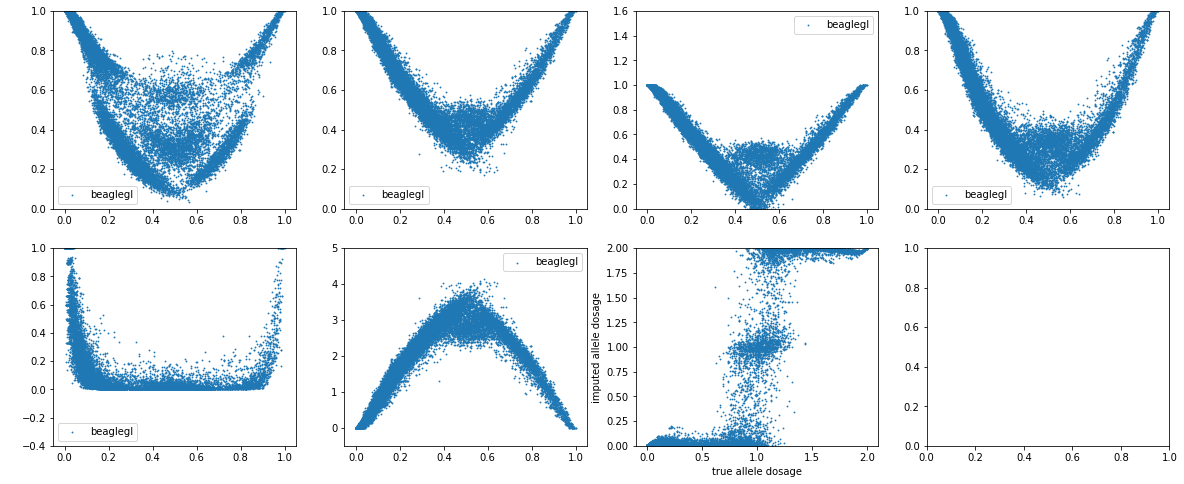

In [24]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [5*4, 4*2]
fig, axes = plt.subplots(2, 4)

tabbeaglegl.plot.scatter('af_info', 'precision_score', ax=axes[0, 0], s=0.7, label='beaglegl')
axes[0, 0].set_ylim(0.0, 1.0)
tabbeaglegl.plot.scatter('af_info', 'accuracy_score', ax=axes[0, 1], s=0.7, label='beaglegl')
axes[0, 1].set_ylim(0.0, 1.0)
tabbeaglegl.plot.scatter('af_info', 'concordance', ax=axes[0, 2], s=0.7, label='beaglegl')
axes[0, 2].set_ylim(0.0, 1.6)
tabbeaglegl.plot.scatter('af_info', 'f1_score', ax=axes[0, 3], s=0.7, label='beaglegl')
axes[0, 3].set_ylim(0.0, 1.0)
tabbeaglegl.plot.scatter('af_info', 'r_squared', ax=axes[1, 0], s=0.7, label='beaglegl')
axes[1, 0].set_ylim(-0.4, 1.0)
tabbeaglegl.plot.scatter('af_info', 'cross_entropy', ax=axes[1, 1], s=0.7, label='beaglegl')
axes[1, 1].set_ylim(-0.5, 5.0)
axes[1, 2].scatter(dosbeaglegl[0], dosbeaglegl[1], s=0.7, label='beaglegl')
axes[1, 2].set_xlabel('true allele dosage')
axes[1, 2].set_ylabel('imputed allele dosage')
axes[1, 2].set_ylim(0.0, 2.0)

for ax in axes.flatten()[:-2]:
    # cast color to white 'w' if dark background
    ax.set_xlabel('true alternate allele frequency', color='w')
    ax.set_ylabel(ax.get_ylabel(), color='w')
plt.savefig(os.path.join(os.path.dirname(paths['beaglegt']['imputed']), 'imputation_quality_gtgl.png'))
plt.show()